## 참고 블로그의 내용을 옮겨 정리

- https://joungheekim.github.io/2020/11/14/code-review/
- https://arxiv.org/abs/1607.00148
    - 논문을 간단하게 리뷰 
    - pytorch 라이브러리를 이용하여 코드를 구현한 내용 확인

- lstm based autoencoder
    - 시계열 정상데이터를 unsupervised 방법으로 학습하고 이상치를 탐지하는 모델
    - 시계열 데이터가 생성되는 다양한 분야에 보편적으로 적용할 수 있다는 장점을 가지고 있어 활용성이 높은 방법론

## 논문

### 다루는 내용

- 이 논문의 큰 특징 2가지는 아래와 같습니다.
    - LSTM Auto-Encoder를 활용하여 다변량 시계열 데이터를 학습하는 방법을 제시합니다.
    - Unbalanced label 시계열 데이터에 Unsupervised Anomaly Detection 방법론을 적용하는 방법에 대해 제시합니다.

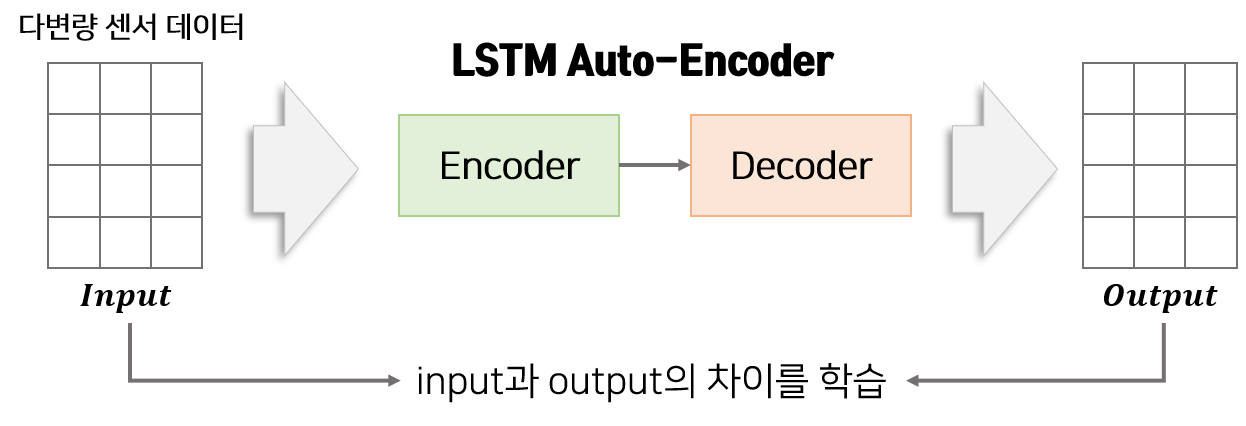

- LSTM Auto-Encoder 모델은 LSTM-Encoder와 LSTM-Decoder로 구성
- Encoder는 다변량 데이터를 압축하여 feature로 변환
- Decoder는 Encoder에서 받은 feature를 이용하여 Encoder에서 받은 다변량 데이터를 재구성
- Encoder의 input과 Decoder에서 나온 output의 차이를 줄이도록 학습함으로써 Auto-Encoder는 정상 데이터의 특징을 압축

### 학습과정

- Encoder의 마지막 step에서 생성된 h_e(t)는 feature vector로 부르며 Decoder의 초기 hidden vector로 활용
- Decoder는 입력으로 Encoder에서 생상한 feature를 받아 original 데이터를 역순으로 재구성
- Decoder는 x(n) x(n-1) x(n-2),,, x(1) 를 차례로 생성
- 이때 decoder의 매 step입력으로 original데이터 역순인 x(t+1)과 이전 step에서 decoder로부터 받은 
  hidden state 벡터인 h_d(t-1)을 활용하여 정보를 압축하여 다음 step의 hidden vector인 h_d(t)를 생성한다. 
- 다음 step의 디코더에 hidden vector h_d(t)를 넘기기전에 fully connected linear layer에 통과시켜 reconstruction 데이터인 x(n-t+1)을 생성
- 오토인코더의 입력과 출력의 차이인 MSE를 최소화하는 방향으로 학습
- 오토인코더를 학습하는 과정에서 이상치가 없는 정상데이터만을 사용한다. 또한 학습과정에서 디코더의 입력으로 오리지날 데이터를 활용하는 teacher forcing테크닉을 적용

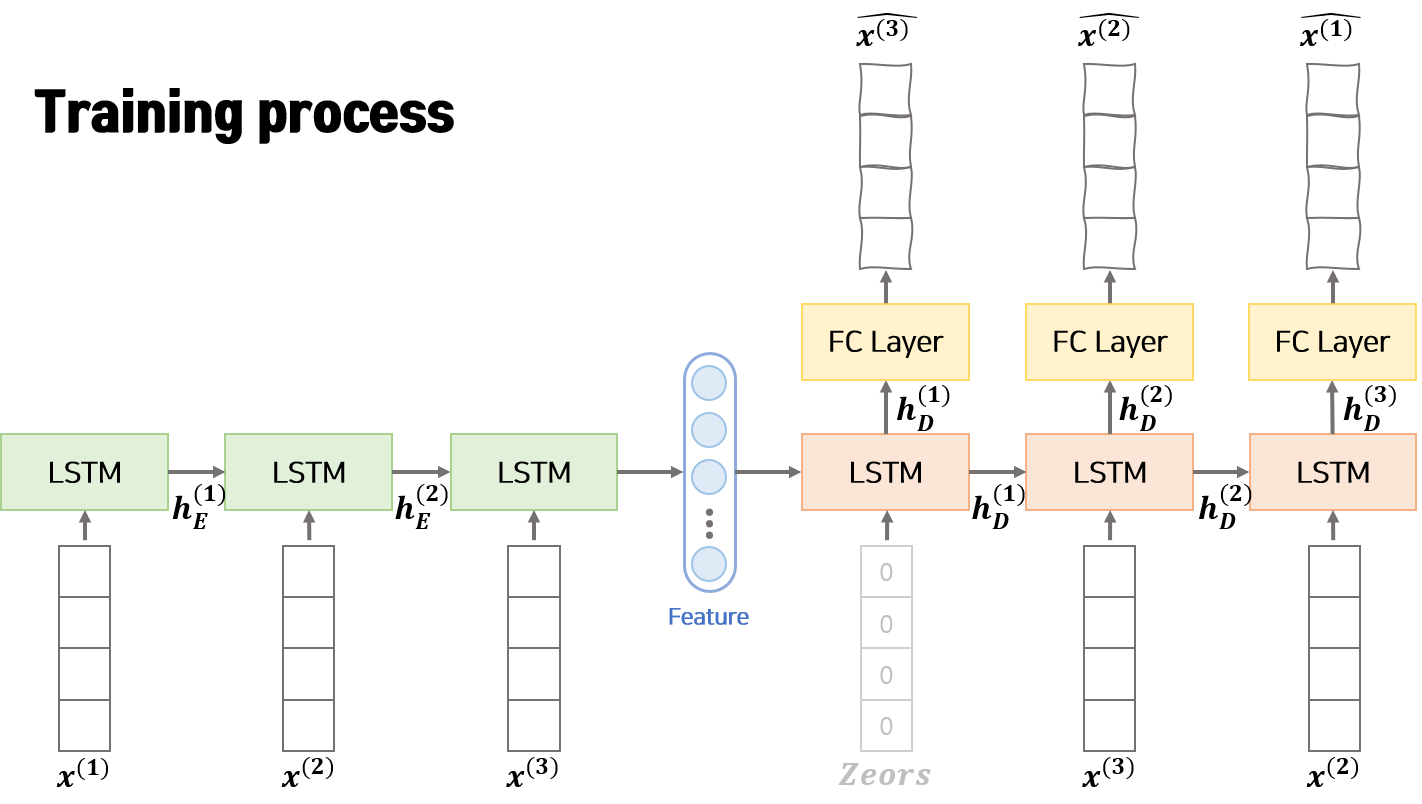

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import easydict
from tqdm.notebook import trange, tqdm
from torch.utils.data import DataLoader, Dataset
from celluloid import Camera
import pandas as pd
import pickle
from typing import List

ModuleNotFoundError: No module named 'easydict'